# Install librares

In [59]:
!pip install seaborn

You should consider upgrading via the '/Users/student/PycharmProjects/Matplotlib_Tutorial/venv/bin/python -m pip install --upgrade pip' command.


# import librares

In [60]:
import requests
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Get url

In [61]:
def get_content(article_name):
    return requests.get(f"https://en.wikipedia.org/wiki/{article_name}").text

In [62]:
data = get_content("Ozone_layer")
# print(data)

# Clean Data

In [63]:
def merge_contents(data):
    content = ''
    clean = soup(data,"html.parser")
    for i in clean.find_all("p"):
        content += i.text.replace(".","").replace(",","").replace("[","").replace("]","").replace("(","").replace(")","").replace("-","").replace('–','') + ' '
    return content

In [64]:
merge_content = merge_contents(data)
# print(merge_content)

# Tokenization

In [65]:
def tokenize(content):
    res = [i.lower() for i in content.split(" ") if i.isalpha()]
    return res

In [66]:
token = tokenize(merge_content)

In [67]:
stop_words = ['be', "the", "a", "of", "to", "in", "about", "are", "from" , "is", 
              "and", "by", "that", "was", "as", "at", "about", 'for' , 'it', 'on',
              'has', 'uv', 'cfcs', 'this', 'with', 'these', 'have',
              'or', 'an', 'were', 'which', 'can', ' into', 'because']

# Filtering

In [68]:
def remove_stop_words(words, stop_words):
  return [x for x in words if x not in stop_words]

In [69]:
filtered_collection = remove_stop_words(token, stop_words)
# print(filtered_collection)

# Term Frequency

In [70]:
import operator
def count_frequency(collection):
    counter = {}
    for letter in collection:
        if letter not in counter:
            counter[letter] = 0
        counter[letter] += 1
    slovar_sorted=sorted(counter.items(), key=operator.itemgetter(1), reverse=True)
    return slovar_sorted

In [71]:
counts_word = count_frequency(filtered_collection)

In [72]:
# print(counts_word)

# Visualizing

In [73]:
%matplotlib inline
def print_most_frequent(frequencies, n):
  df = pd.DataFrame.from_records(frequencies)
  df.columns = ['Frequencies', 'Total Count']
  df2 = df.head(n)
  fig, ax = plt.subplots(figsize=(16, 12))
  ax.set_facecolor("black")
  sns.set(style="whitegrid")
  sns.set_color_codes("muted")
  sns.barplot(x="Total Count", y="Frequencies", 
            data=df2).set(title='Most Common Tokens in the Ozone Layer article')

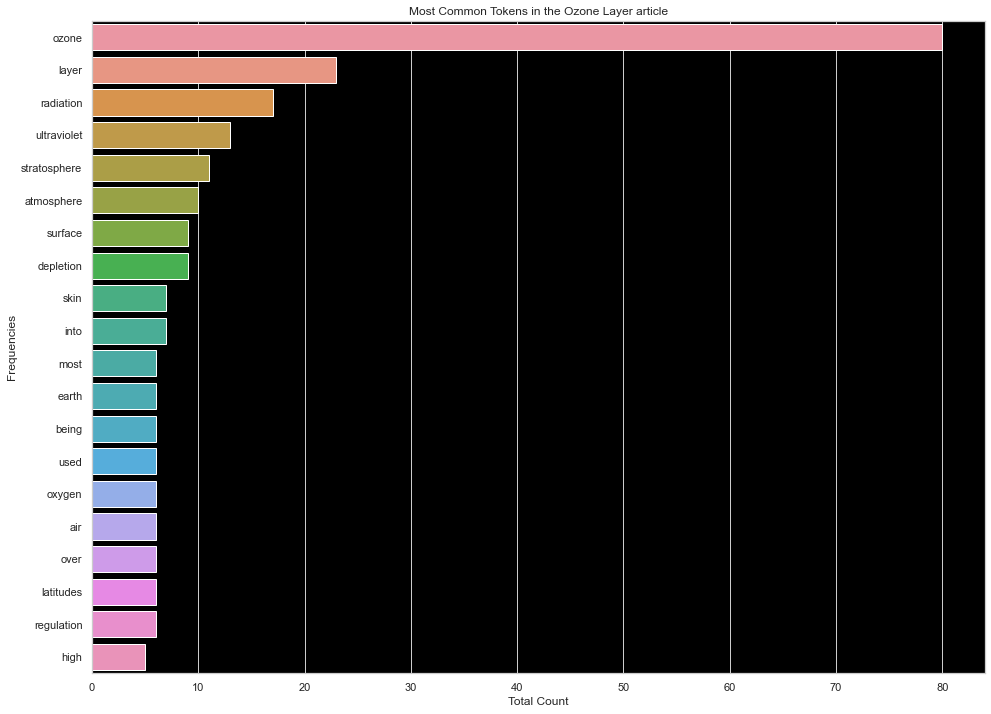

In [74]:
print_most_frequent(counts_word, 20)